In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   ## Importing Libraries

In [110]:
file = pd.ExcelFile('/content/heart_disease.xlsx')
abr = pd.read_excel(file, 'Description')          # Coloumn headers abbreviation sheet
df = pd.read_excel(file, 'Heart_disease')         # Main dataframe sheet

In [111]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [112]:
df.shape

(908, 13)

In [113]:
df.info()        # we have 6 numerical columns , 6 categorical columns and 1 boolean column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [114]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [115]:
df.isnull().sum()        # 62 null values are present in oldpeak

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [116]:
#filling null values using meadian values
median_values=df['oldpeak'].median()
df['oldpeak'].fillna(median_values,inplace=True)

In [117]:
df.isnull().sum()    # now no missing values are present

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [118]:
df.shape

(908, 13)

In [119]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

In [120]:
df[numerical_cols].corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.217942,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.134945,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.032205,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.112624,-0.323058
oldpeak,0.217942,0.134945,0.032205,-0.112624,1.000000,0.406078
num,0.326493,0.137251,-0.238813,-0.323058,0.406078,1.000000


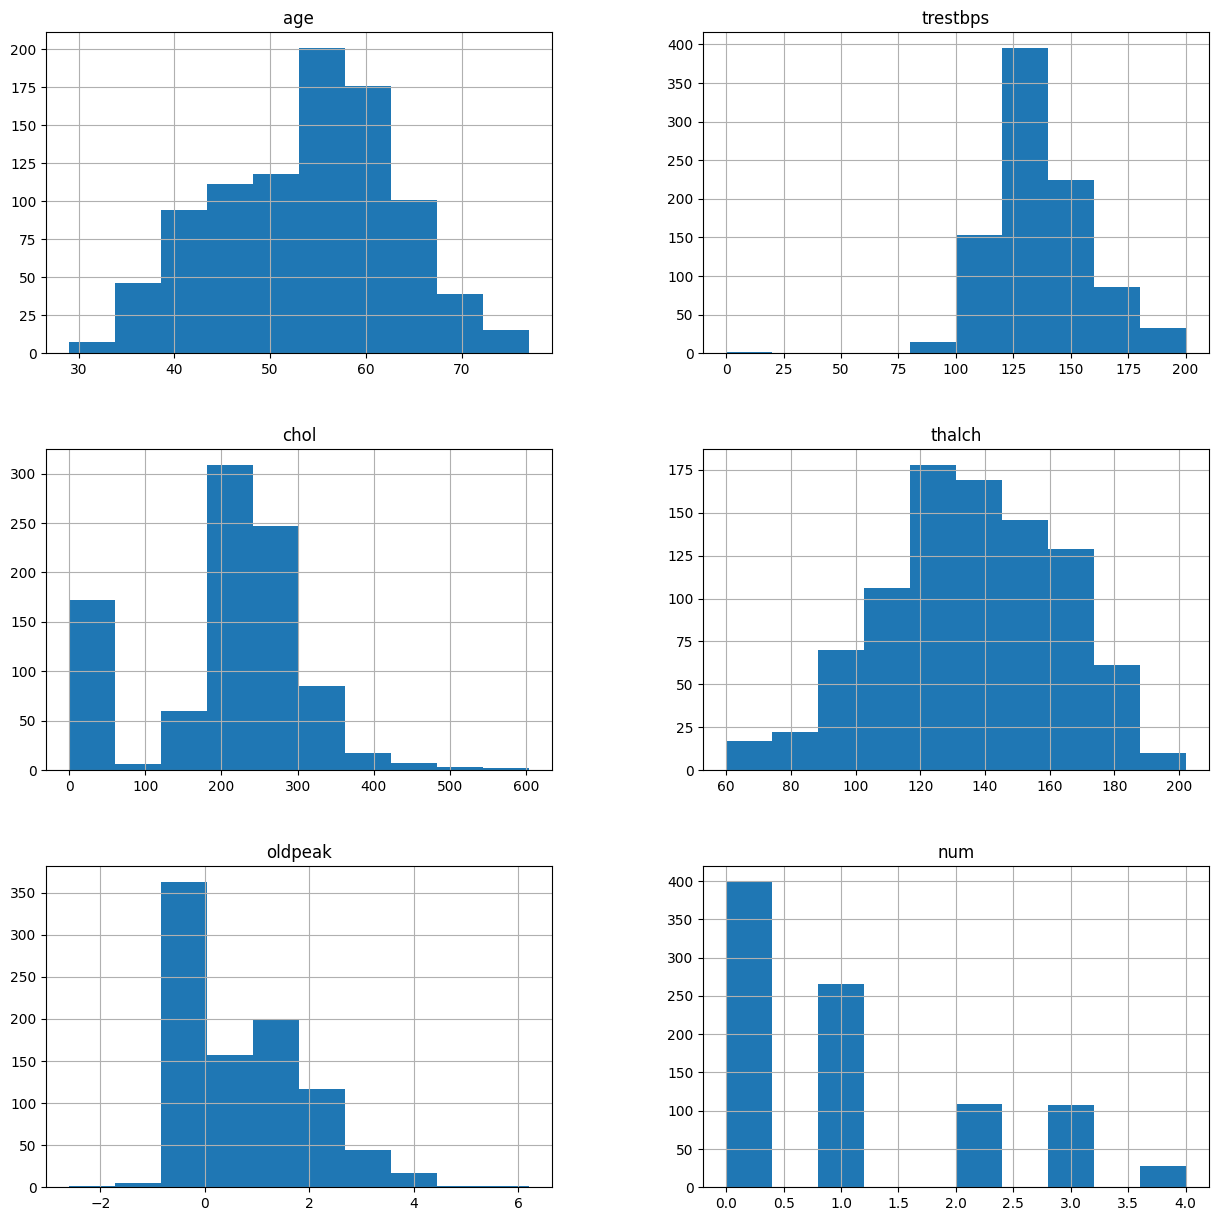

In [121]:
df.hist(figsize=(15, 15))
plt.show()

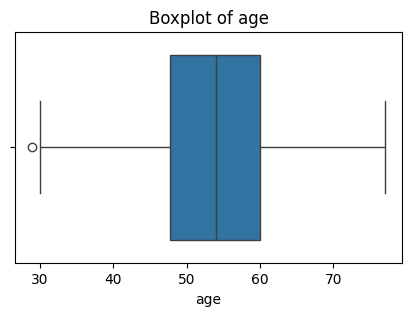

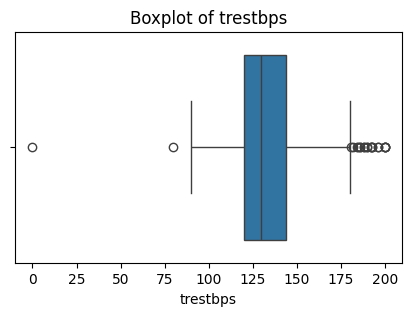

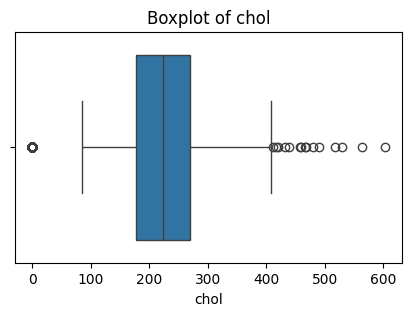

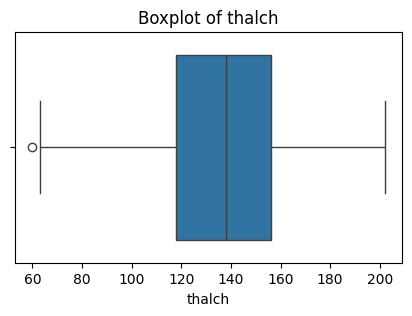

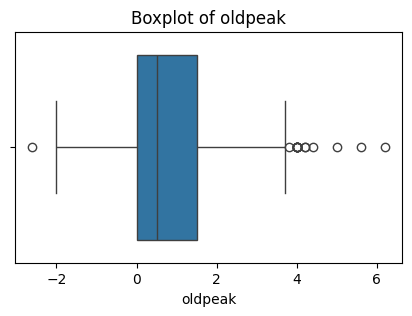

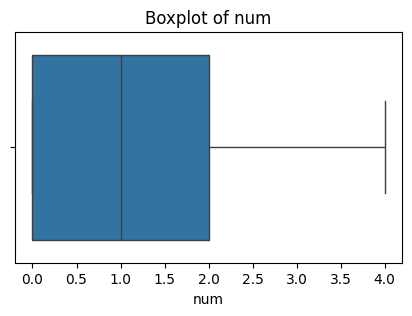

In [122]:
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [123]:
#  feature engineering

df.drop_duplicates(inplace=True)

In [124]:
df.shape    # one duplicate value were present

(907, 13)

In [125]:
# Converting categorical data into numerical

from sklearn.preprocessing import LabelEncoder

In [126]:
cat_cols = df.select_dtypes(include=['object','bool']).columns
cat_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [127]:
## Apply label Encoding

le = LabelEncoder()
for col in cat_cols:
    # Convert all values in the column to string type
    df[col] = df[col].astype(str)
    # Apply label encoding
    df[col] = le.fit_transform(df[col])

In [128]:
df       # All categorical data converted to numerical

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.5,2,2,4
904,62,1,0,166,170,0,2,120,3,3.0,1,2,4
905,56,1,2,170,0,0,0,123,3,2.5,0,1,4
906,56,1,2,144,208,1,2,105,2,0.5,0,0,4


In [129]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalch,int64
exang,int64
oldpeak,float64


In [130]:
### Scaling numeric features

from sklearn.preprocessing import StandardScaler

In [131]:
sc = StandardScaler()
data = sc.fit_transform(df)

In [132]:
data

array([[ 1.00609656,  0.51477473,  2.32249077, ..., -1.67627931,
        -1.61530093, -0.88090095],
       [-1.39644661,  0.51477473,  0.23374597, ..., -0.22691293,
        -1.61530093, -0.88090095],
       [ 0.35085751,  0.51477473, -0.81062643, ..., -0.22691293,
        -1.61530093, -0.88090095],
       ...,
       [ 0.241651  ,  0.51477473,  1.27811837, ..., -1.67627931,
        -0.25496858,  2.61571681],
       [ 0.241651  ,  0.51477473,  1.27811837, ..., -1.67627931,
        -1.61530093,  2.61571681],
       [ 0.35085751,  0.51477473, -0.81062643, ..., -0.22691293,
         1.10536377,  2.61571681]])

In [133]:
new_df=pd.DataFrame(data,columns=df.columns)

In [134]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006097,0.514775,2.322491,0.568184,0.281318,1.975526,-1.560916,0.523285,-0.773147,1.353255,-1.676279,-1.615301,-0.880901
1,-1.396447,0.514775,0.233746,0.077848,0.013691,-0.506194,0.015644,-0.148399,-0.773147,-0.816467,-0.226913,-1.615301,-0.880901
2,0.350858,0.514775,-0.810626,0.323016,-0.084439,-0.506194,0.015644,0.448654,-0.773147,-0.439124,-0.226913,-1.615301,-0.880901
3,-0.195175,0.514775,2.322491,-0.755723,-0.137964,-0.506194,-1.560916,2.015918,-0.773147,-0.816467,-0.226913,-1.615301,-0.880901
4,0.350858,0.514775,-0.810626,-1.147992,-0.004151,-0.506194,0.015644,-0.372294,1.262395,0.598569,-0.226913,-1.615301,-0.880901


In [135]:
## Decision Tree Classification

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [136]:
new_df['num'].isnull().sum()

np.int64(0)

In [137]:
new_df['num'] = (df['num'] > 0).astype(int)

x=new_df.drop('num',axis=1)
y=new_df.num


In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
y_train.fillna(y_train.mean(),inplace=True)
y_test.fillna(y_test.mean(),inplace=True)
y_train=y_train.astype(int)
y_test=y_test.astype(int)             # Spliting the dataset into training and testing sets

In [139]:
model=DecisionTreeClassifier(criterion='entropy',random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [140]:
#evaluate the model
pred=model.predict(x_test)

In [141]:
pd.Series(pred).value_counts()

,count
1,94
0,88


In [142]:
model.feature_importances_

array([0.16012296, 0.01644831, 0.19654154, 0.09427864, 0.15337294,
       0.02134183, 0.03256938, 0.09279458, 0.06023576, 0.10330361,
       0.01975796, 0.04923249])

In [143]:
np.mean(pred==y_test)   #to measure accuracy

np.float64(0.7637362637362637)

In [144]:
accuracy = accuracy_score(y_test, pred)  # another way to measure accuracy
accuracy

0.7637362637362637

In [145]:
pd.crosstab(y_test,pred)

col_0,0,1
num,,
0,67,22
1,21,72


In [146]:
accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test,pred, average='weighted')
roc_auc = roc_auc_score(y_test,pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7637362637362637
Precision: 0.7637110230195336
Recall: 0.7637362637362637
F1 Score: 0.7637005732718594
ROC-AUC: 0.7635012685755709


In [147]:
## Hyperparameter Tuning:

from sklearn.model_selection import GridSearchCV

#defining grid
param_grid= {
    'max_depth':[2,3,5,7,9],
    'min_samples_split':[2,3,4,5,7,10],
    'criterion':['gini','entropy']
}

In [148]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 9],
                         'min_samples_split': [2, 3, 4, 5, 7, 10]})

In [149]:
  # getting best parameters
best_param=grid.best_params_

In [150]:
# showing best model
best_model=grid.best_estimator_

In [151]:
#evaluating best models
pred=best_model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
precision=precision_score(y_test,pred,average='weighted')
recall=recall_score(y_test,pred,average='weighted')
f1=f1_score(y_test,pred,average='weighted')
roc_auc=roc_auc_score(y_test,pred)

print('best estimators=', best_param)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1)
print('roc_auc_score',roc_auc)

best estimators= {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
accuracy 0.7692307692307693
precision 0.7733409447695163
recall 0.7692307692307693
f1_score 0.7678827196899485
roc_auc_score 0.7676694454512505


<Axes: >

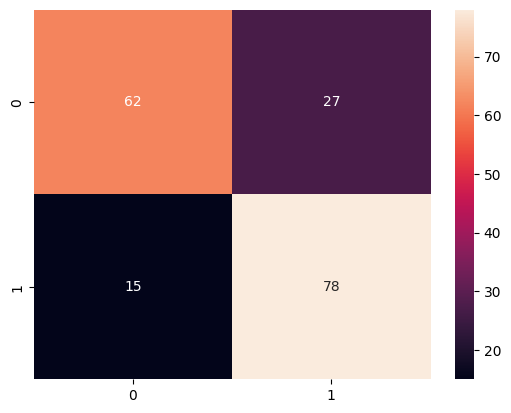

In [152]:
# model evaluation
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [153]:
cm

array([[62, 27],
       [15, 78]])

In [154]:
importances = best_model.feature_importances_
for i, feature in enumerate(x.columns):
    print(f"{feature}: {importances[i]}")

age: 0.10683812836884292
sex: 0.031511074209101764
cp: 0.4552226673785527
trestbps: 0.029800802832538942
chol: 0.1844965345453551
fbs: 0.0
restecg: 0.0
thalch: 0.024373643310424832
exang: 0.1273680404601461
oldpeak: 0.003719506633322454
slope: 0.0
thal: 0.03666960226171507


[Text(0.5059523809523809, 0.9166666666666666, 'cp <= -0.288\ngini = 0.49\nsamples = 725\nvalue = [311, 414]\nclass = 1'),
 Text(0.32142857142857145, 0.75, 'exang <= 0.754\ngini = 0.337\nsamples = 405\nvalue = [87, 318]\nclass = 1'),
 Text(0.41369047619047616, 0.8333333333333333, 'True  '),
 Text(0.19047619047619047, 0.5833333333333334, 'chol <= -1.418\ngini = 0.457\nsamples = 181\nvalue = [64, 117]\nclass = 1'),
 Text(0.09523809523809523, 0.4166666666666667, 'age <= 0.897\ngini = 0.113\nsamples = 50\nvalue = [3, 47]\nclass = 1'),
 Text(0.047619047619047616, 0.25, 'trestbps <= -1.418\ngini = 0.05\nsamples = 39\nvalue = [1, 38]\nclass = 1'),
 Text(0.023809523809523808, 0.08333333333333333, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = 1'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]\nclass = 1'),
 Text(0.14285714285714285, 0.25, 'trestbps <= 0.936\ngini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = 1'),
 Text(0.11904761904761904, 0.083

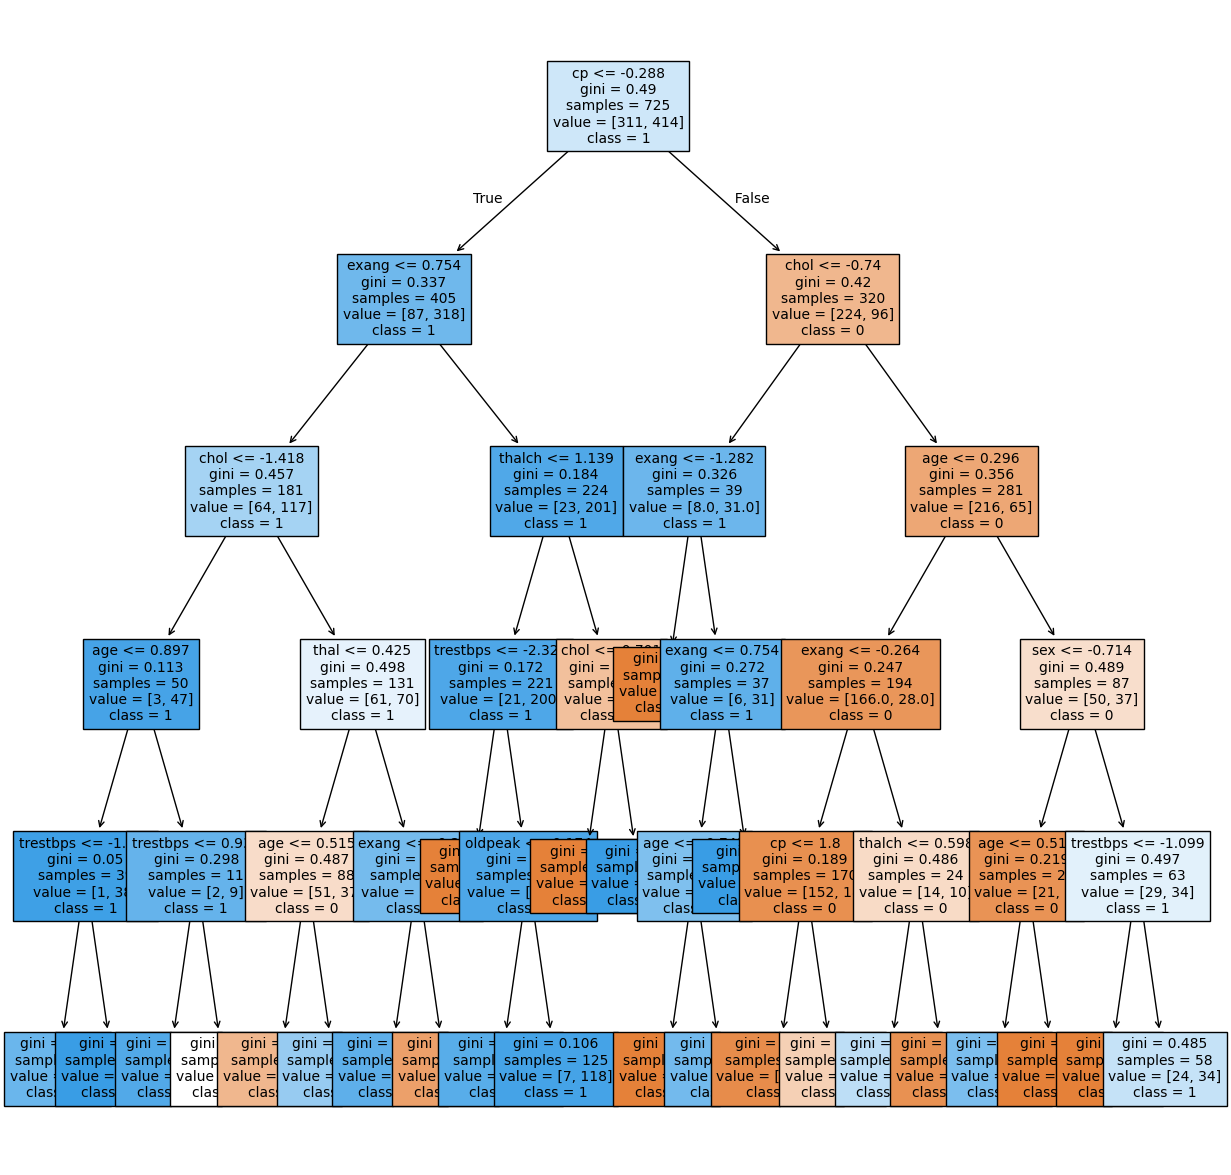

In [155]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(best_model,feature_names=x.columns.tolist(),class_names=['0','1'],fontsize=10,filled=True)

Interview Questions:


1.Decision Trees have several hyperparameters that significantly impact their performance. These include:

max_depth: Limits the tree depth. Prevents overfitting if too deep, underfitting if too shallow.

min_samples_split: Minimum number of samples required to split a node. Higher values make the tree more conservative.

min_samples_leaf: Minimum samples required in a leaf node. Controls tree complexity and smooths predictions.

criterion: Splitting strategy (gini or entropy). Affects how the tree decides splits.

max_features: Limits the number of features to consider at each split. Helps with generalization.

These hyperparameters control the balance between bias and variance, impacting both training accuracy and generalization.


2.One-hot encoding and label encoding are two techniques used to convert categorical data into a numerical format suitable for machine learning algorithms. One-hot encoding creates a new binary column for each category, while label encoding assigns a unique numerical value to each category. One-hot encoding is generally preferred for nominal data where order doesn't matter, while label encoding can be used for ordinal data where order is important.

Example:
Let's say you have a feature called "Color" with categories: "Red," "Blue," and "Green."

One-Hot Encoding:
Would create three new columns: "Red," "Blue," and "Green." A car with color "Red" would have "Red" = 1 and "Blue" and "Green" = 0.

Label Encoding:
Would assign numerical values (e.g., Red=1, Blue=2, Green=3) to the categories.

In [156]:
## Done